## Исследование цен на недвижимость в Сиэтле

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('train_data.csv')
print (train_data.shape)
train_data.head()

(17290, 20)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20140915T000000,392000.0,4,3.75,2220,3797,1.5,0,0,4,6,1330,890,1917,0,98108,47.5574,-122.315,1490,4340
1,20140730T000000,300000.0,3,2.25,1960,1585,2.0,0,0,3,7,1750,210,2003,0,98118,47.5414,-122.288,1760,1958
2,20150325T000000,440000.0,2,1.50,1330,15873,1.0,0,0,3,7,900,430,1984,0,98074,47.6359,-122.033,1610,12043
3,20150219T000000,800500.0,4,2.50,1780,11130,1.0,0,0,5,8,1780,0,1962,0,98005,47.5931,-122.178,2610,11130
4,20140701T000000,485000.0,4,1.75,1430,4096,2.0,0,0,3,7,1430,0,1900,0,98122,47.6040,-122.306,1640,3377


In [3]:
test_data = pd.read_csv('test_data.csv')
print (test_data.shape)
train_data.head()

(4323, 19)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20140915T000000,392000.0,4,3.75,2220,3797,1.5,0,0,4,6,1330,890,1917,0,98108,47.5574,-122.315,1490,4340
1,20140730T000000,300000.0,3,2.25,1960,1585,2.0,0,0,3,7,1750,210,2003,0,98118,47.5414,-122.288,1760,1958
2,20150325T000000,440000.0,2,1.50,1330,15873,1.0,0,0,3,7,900,430,1984,0,98074,47.6359,-122.033,1610,12043
3,20150219T000000,800500.0,4,2.50,1780,11130,1.0,0,0,5,8,1780,0,1962,0,98005,47.5931,-122.178,2610,11130
4,20140701T000000,485000.0,4,1.75,1430,4096,2.0,0,0,3,7,1430,0,1900,0,98122,47.6040,-122.306,1640,3377


Посмотрим сводную информацию по датасету:

In [4]:
train_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,5.385511e+05,3.364025,2.111495,2073.323135,1.499664e+04,1.494361,0.007345,0.231405,3.406883,7.651822,1784.080335,289.242799,1971.044014,84.498323,98077.814286,47.560276,-122.214056,1982.792539,12661.981724
std,3.624858e+05,0.932223,0.768665,915.867612,4.060774e+04,0.540440,0.085392,0.761939,0.651066,1.173284,825.505311,441.569195,29.372193,401.905019,53.386571,0.138424,0.140517,683.163995,26526.840702
min,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.519000,460.000000,659.000000
25%,3.230000e+05,3.000000,1.500000,1420.000000,5.030000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98033.000000,47.472600,-122.328000,1480.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.583500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572150,-122.229000,1840.000000,7600.000000
75%,6.410000e+05,4.000000,2.500000,2540.000000,1.063250e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.750000,560.000000,1997.000000,0.000000,98117.000000,47.678000,-122.124000,2360.000000,10078.750000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


Проведем небольшое исследование данных:

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Как видно из графика ниже, у подавляющего большинства домов в датасете количество спален 3 или 4

<function seaborn.utils.despine>

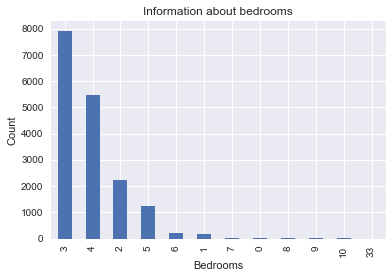

In [6]:
train_data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Information about bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

Давайте посмотрим, является ли верным утверждение, что цена дома зависит от количества спален:

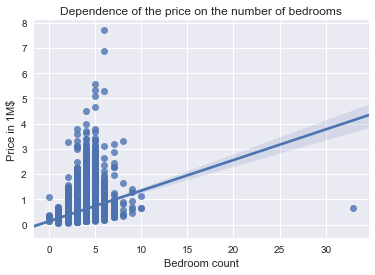

In [7]:
sns.regplot(train_data['bedrooms'], train_data['price'] / 1000000)
plt.title('Dependence of the price on the number of bedrooms')
plt.xlabel('Bedroom count')
plt.ylabel('Price in 1M$')

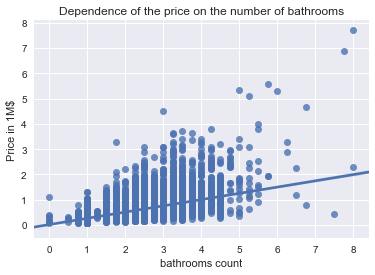

In [9]:
sns.regplot(train_data['bathrooms'], train_data['price'] / 1000000)
plt.title('Dependence of the price on the number of bathrooms')
plt.xlabel('bathrooms count')
plt.ylabel('Price in 1M$')

Имея в распоряжении географические координаты местоположения каждого объекта, можем построить карту распределение домов. 
При желании, можно пойти дальше и наложить полученное распределение на карту Сиэтла, но в рамках решения данной задачи мы это делать не станем. 

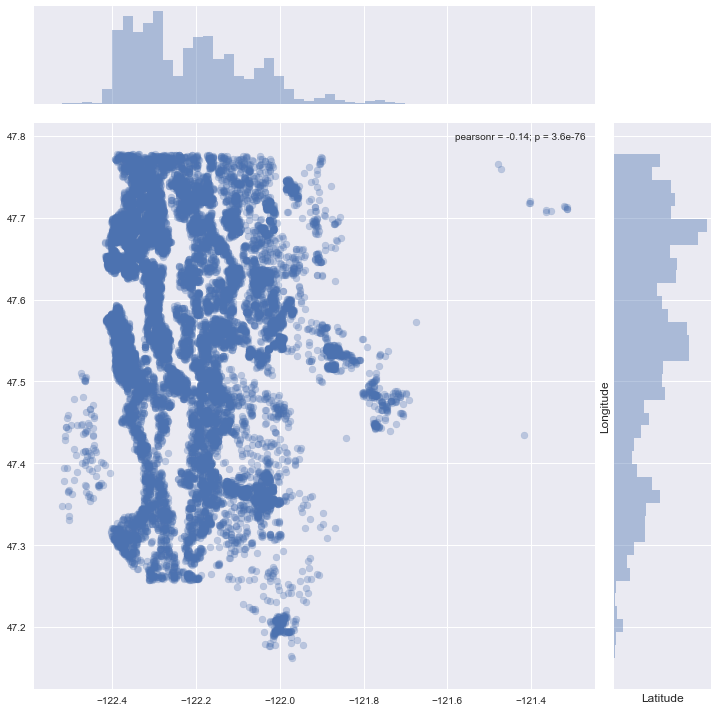

<function seaborn.utils.despine>

In [10]:
plt.figure(figsize=(10,10))
sns.jointplot(x=train_data.long.values, y=train_data.lat.values, size=10, alpha = 0.3)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

sns.despine

Рассмотрим зависимость общей площади дома от цены:

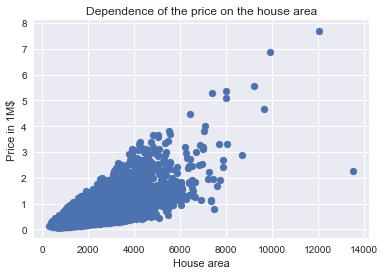

In [11]:
plt.scatter(train_data['sqft_living'], train_data['price'] / 1000000)
plt.title('Dependence of the price on the house area')
plt.xlabel('House area')
plt.ylabel('Price in 1M$')

Проанализируем, имеет ли для нашего датасета значение параметр waterfront

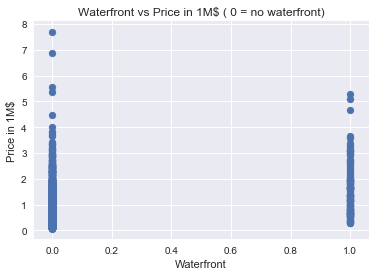

In [12]:
plt.scatter(train_data.waterfront, train_data.price / 1000000)
plt.title("Waterfront vs Price in 1M$ ( 0 = no waterfront)")
plt.xlabel('Waterfront')
plt.ylabel('Price in 1M$')

Построим график зависимости цены от этажности недвижимости

<function seaborn.utils.despine>

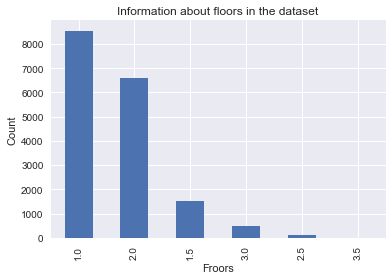

In [13]:
train_data['floors'].value_counts().plot(kind='bar')
plt.title('Information about floors in the dataset')
plt.xlabel('Froors')
plt.ylabel('Count')
sns.despine

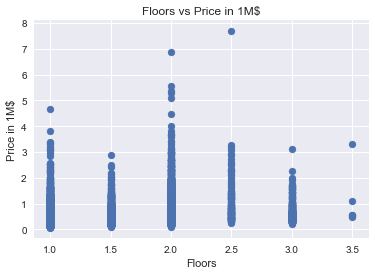

In [14]:
plt.scatter(train_data.floors, train_data.price / 1000000)
plt.title("Floors vs Price in 1M$")
plt.xlabel('Floors')
plt.ylabel('Price in 1M$')


Теперь рассмотрим, является ли верным утверждение, что средняя цена отличается в зависимости от района.
Возьмем десять случайных индексов и построим диаграммы:

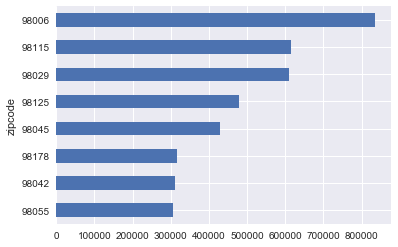

In [15]:
random_zip = np.random.choice(train_data['zipcode'], 10)
random_select = train_data.loc[train_data['zipcode'].isin(random_zip)]

random_select.groupby('zipcode')['price'].mean().sort_values(ascending=True)[:10].plot(kind = 'barh', rot = 0)

Итоговой диаграммой проведомых исследований станет корреляционная матрица - она предоставляет диаграмму, которая способна помочь отобрать признаки, основываясь на соответствующих им линейных корреляциях:

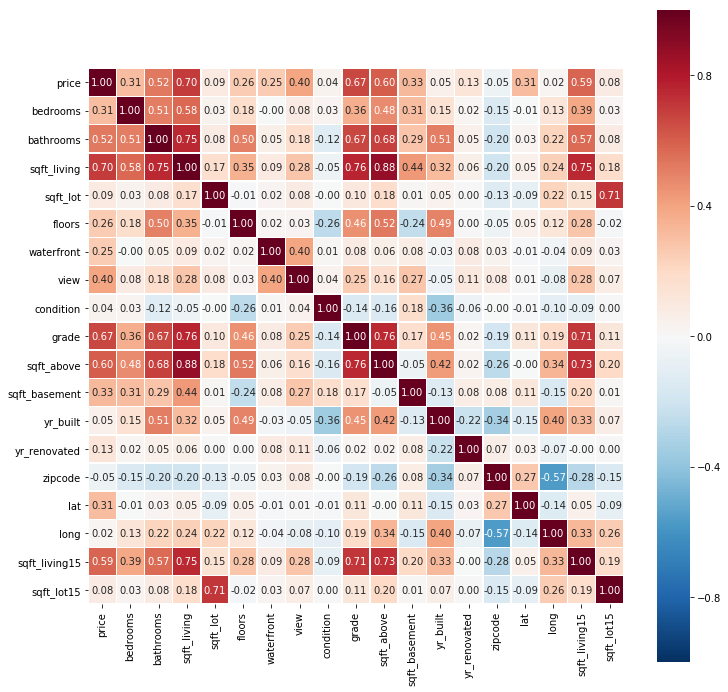

In [16]:
sns.reset_orig()

fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(train_data.corr(), cbar = True,
                 annot = True,
                 square = True,
                 fmt='.2f',
                 annot_kws ={'size': 10},
                linewidths=.5, ax=ax)


Наc интересует параметр price. Как видно на картинке выше, наибольшую корреляцию параметр price имеет с площадью дома (sqft_living) - (0.70), классом жилищного блока (grade) - (0.67) и количеством ванных комнат (bathrooms) - (0.52).

In [17]:
# Для упрощения задачи, а так же для того, чтобы
# ошибки в прогнозировании дорогих домов и дешевых домов повлияли на результат в равной степени
# будем работать с натуральным логарифмом цен
train_data['log_price'] = np.log1p(train_data.price)
train_data['age'] = train_data.apply(lambda rec: int(rec.date[0:4]) - rec.yr_built, axis = 1)
train_data['year'] = train_data.apply(lambda rec: int(rec.date[0:4]), axis = 1)

test_data['age'] = test_data.apply(lambda rec: int(rec.date[0:4]) - rec.yr_built, axis = 1)
test_data['year'] = test_data.apply(lambda rec: int(rec.date[0:4]), axis = 1)

In [18]:
import math
numerical_features = ['bedrooms', 'age', 'year', 'bathrooms', 'sqft_living',
                    'view', 'condition', 'grade', 'floors',
                    'sqft_lot', 'sqft_above', 'sqft_basement',
                    'sqft_living15', 'sqft_lot15']
train_data['is_renovated'] = train_data['yr_renovated'].map(lambda rec: int( rec != 0))
test_data['is_renovated'] = test_data['yr_renovated'].map(lambda rec: int( rec != 0))

In [19]:
categorical_features = ['waterfront', 'is_renovated']

In [20]:
all_features = numerical_features + categorical_features

In [21]:
train_data_final = train_data[all_features]
test_data_final = test_data[all_features]

In [22]:
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop(colname, axis = 1, inplace = True)
    return df

In [23]:
for c_feature in categorical_features:
    train_data_final = create_dummies(train_data_final, c_feature)
    test_data_final = create_dummies(test_data_final, c_feature)


Для прогнозирования цен на недвижимость, в данной задаче будем использовать линейную регрессию. Разобьем тренировочной датасет на два, обучим модель и проверим результат обучения:

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Функция для представления модели:

In [26]:
def model_evaluate(model_):
    pred_df = pd.DataFrame({ "actual": test_y, "predicted" : model_.predict( test_X ) })
    pred_df['resid'] = pred_df.actual - pred_df.predicted
    rmse = np.sqrt(metrics.mean_squared_error( pred_df.actual, pred_df.predicted ))
    r2 = metrics.r2_score( pred_df.actual, pred_df.predicted )
    print("RMSE: ", np.round(rmse, 2), " : ", "R Squared: ", np.round(r2, 2))
    return pred_df, rmse, r2

In [27]:
train_X, test_X, train_y, test_y = train_test_split(train_data_final,
                                                  train_data.log_price,
                                                  test_size = 0.3,
                                                  random_state = 1000)

In [28]:
linreg = LinearRegression(normalize = True)
linreg.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

Результаты обучения модели:

In [29]:
pred_df, rmse, r2 = model_evaluate(linreg)

RMSE:  0.32  :  R Squared:  0.65


Попробуем увеличить точность предсказаний, используя другой метод обучения - Gradient Boosting Regressor из группы алгоритмических ансамблей

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gra_boost_m = GradientBoostingRegressor(learning_rate = 0.2, n_estimators = 200, max_depth = 5)

In [31]:
gra_boost_m.fit(train_X, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [32]:
gra_pred, gra_rmse, gra_r2 = model_evaluate(gra_boost_m)

RMSE:  0.29  :  R Squared:  0.71


Сравнение полученых результатов от двух моделей:

In [33]:
#print(gra_pred.head())
# print(pred_df.head())

gra_pred.join(pred_df, how = 'outer', lsuffix='_gra')[:10]

,actual_gra,predicted_gra,resid_gra,actual,predicted,resid
2849,13.910822,13.189588,0.721234,13.910822,12.960659,0.950163
7785,12.577640,12.718298,-0.140659,12.577640,12.764145,-0.186505
12620,12.464587,12.889794,-0.425207,12.464587,13.066792,-0.602205
6949,13.085701,12.856831,0.228871,13.085701,13.042656,0.043046
14567,12.676079,12.961861,-0.285782,12.676079,13.191651,-0.515571
16081,12.879020,12.692974,0.186046,12.879020,13.022183,-0.143163
6917,13.070019,12.984827,0.085192,13.070019,12.530778,0.539241
14016,13.217675,12.987643,0.230032,13.217675,13.277459,-0.059784
14985,12.345839,12.487098,-0.141259,12.345839,12.472934,-0.127095
6661,13.928840,13.748717,0.180123,13.928840,13.419300,0.509540


Предсказываем цену на тестовой выборке и сохраняем данные в файл:

In [34]:
my_pred = pd.DataFrame(test_data_final) 
my_pred['predicted_price'] = gra_boost_m.predict(test_data_final)
my_pred['predicted_price'] = np.round(np.expm1(my_pred['predicted_price']), 0)
my_pred.head()


,bedrooms,age,year,bathrooms,sqft_living,view,condition,grade,floors,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,waterfront_1,is_renovated_1,predicted_price
0,3,54,2014,1.00,890,0,4,7,1.0,9870,890,0,1270,9861,0,0,230499.0
1,1,83,2014,1.00,800,0,2,6,1.0,16306,680,120,1270,8666,0,0,171367.0
2,3,9,2014,2.50,1750,0,3,7,2.0,4200,1750,0,1890,4048,0,0,351331.0
3,3,7,2014,3.25,1510,0,3,7,3.0,1245,1510,0,1510,1245,0,0,387079.0
4,3,41,2014,1.75,1390,0,4,7,1.0,9585,1390,0,1240,8188,0,0,289874.0


In [35]:
my_pred.to_csv('result_of_my_research.csv', sep=',', encoding='utf-8')